In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The `total_bedrooms` column has some missing entries. So, we'll drop the rows where the entries are missing.
* data.dropna() - drops the rows with null entries and returns the new dataset
* data.dropna(inplace=True) - drops the rows with null entries from the original dataset object i.e `data`

In [6]:
data.dropna(inplace=True) 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


The `ocean_proximity` feature is of string datatype, so we'll exclude it for now for visualizing the data

In [35]:
data.columns
print(data.columns)
numerical_columns = data.select_dtypes(include=["float64","int64"]).columns
print(numerical_columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


The *target* variable in this dataset is `median_house_value` since the value is what the model is going to predict.

The rest of the variables are *features*
* X - Features
* y - Target

In [16]:
from sklearn.model_selection import train_test_split
X=data.drop(["median_house_value"],axis=1)
y=data["median_house_value"]

The `train_test_split` function splits the entire dataset into two parts. That are obviously for training and testing respectively.

The idea is to train the model on a certain set of examples. Once the model is trained, it is to be tested on completely new set of examples.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5628,-118.27,33.76,46.0,22.0,11.0,32.0,7.0,3.1250,NEAR OCEAN,112500.0
7536,-118.22,33.92,23.0,926.0,409.0,1856.0,408.0,2.1366,<1H OCEAN,100000.0
7663,-118.22,33.83,43.0,1426.0,272.0,871.0,276.0,3.7083,<1H OCEAN,175200.0
18400,-121.84,37.25,25.0,5939.0,989.0,3275.0,954.0,5.6488,<1H OCEAN,234600.0
2481,-120.43,36.18,29.0,579.0,116.0,218.0,99.0,2.1458,INLAND,104200.0
...,...,...,...,...,...,...,...,...,...,...
18864,-122.21,38.10,36.0,3018.0,557.0,1445.0,556.0,3.8029,NEAR BAY,129900.0
9726,-121.73,36.85,22.0,1304.0,278.0,887.0,227.0,3.6607,<1H OCEAN,206300.0
559,-122.24,37.76,52.0,2504.0,516.0,979.0,472.0,3.4762,NEAR BAY,244000.0
9730,-121.74,36.79,16.0,3841.0,620.0,1799.0,611.0,4.3814,<1H OCEAN,245300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

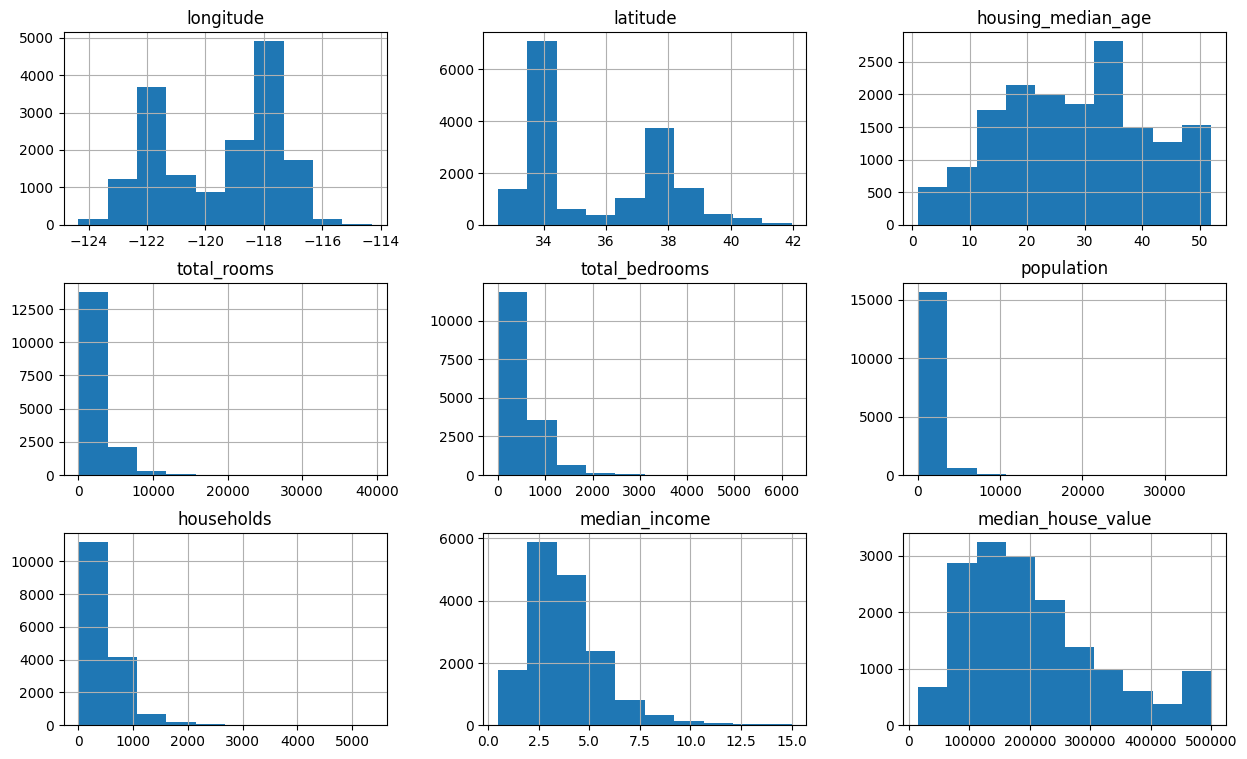

In [29]:
train_data.hist(figsize=(15,9))

<Axes: >

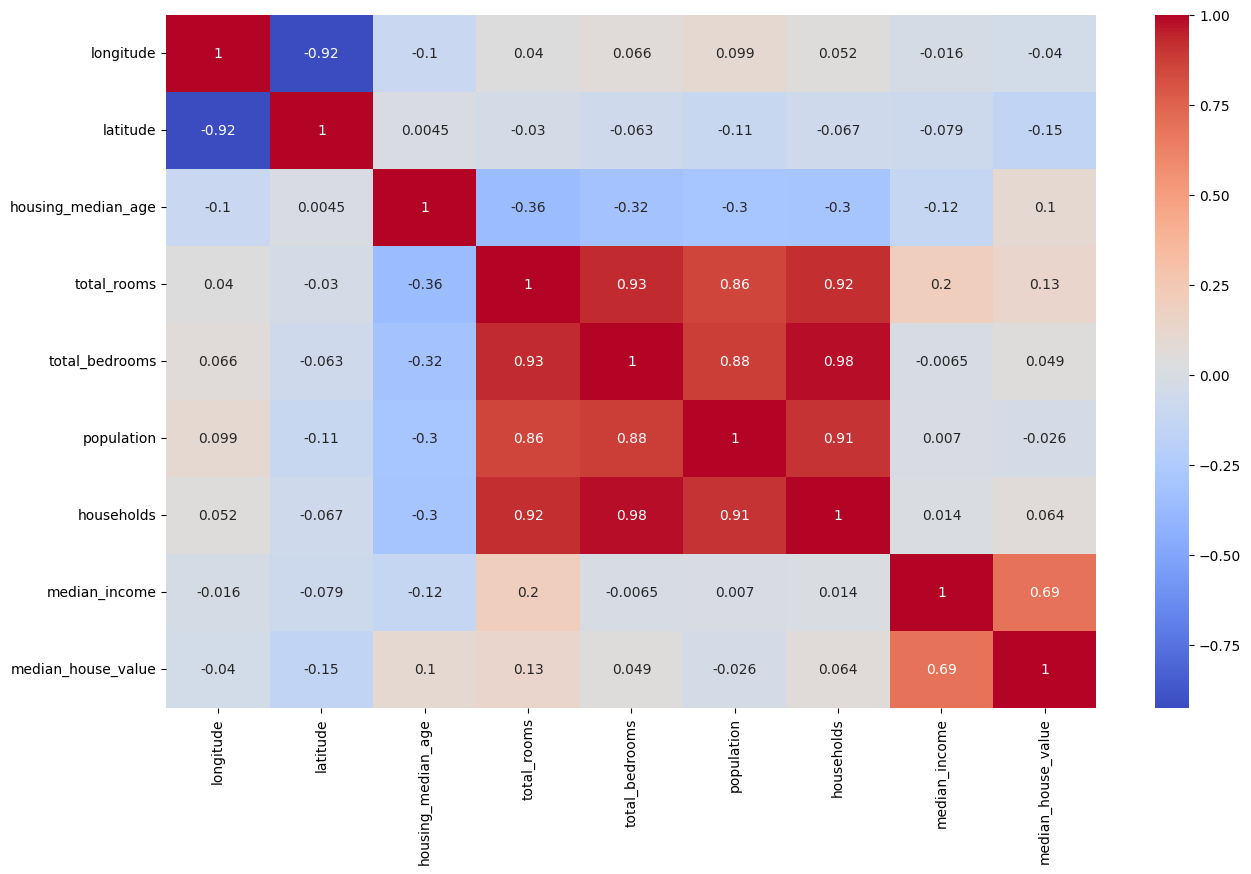

In [36]:
plt.figure(figsize=(15,9))
sns.heatmap(train_data[numerical_columns].corr(),annot=True, cmap="coolwarm")

Based on the heatmap, we can see that the `median_income` is highly correlated with our target `median_house_value`

## Data Preprocessing